# 

In [83]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#READ INSURANCE DATASET
df = pd.read_csv('insurance.csv');

In [6]:
#DATASET HEAD
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [96]:
#GET DATASET INFO
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB


In [7]:
#MORE DETAILS OF THE DATASET WITH DESCRIBE METHOD
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
#ENCODE CATEGORICAL DATA INTO INTEGER VALUES
from sklearn.preprocessing  import LabelEncoder 
le =  LabelEncoder();

df['sex'] = le.fit_transform(df['sex']);
df['smoker'] = le.fit_transform(df['smoker']);
df['region'] = le.fit_transform(df['region']);



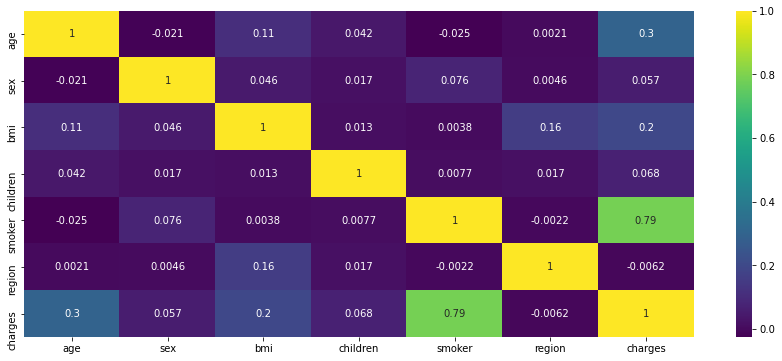

In [9]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),cmap="viridis",annot=True);

# smoker has highest correlation with charges 

In [10]:
#FEATURES
x = df.drop('charges',axis=1)
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [11]:
#TARGET
y= df.charges
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

<Figure size 864x360 with 0 Axes>

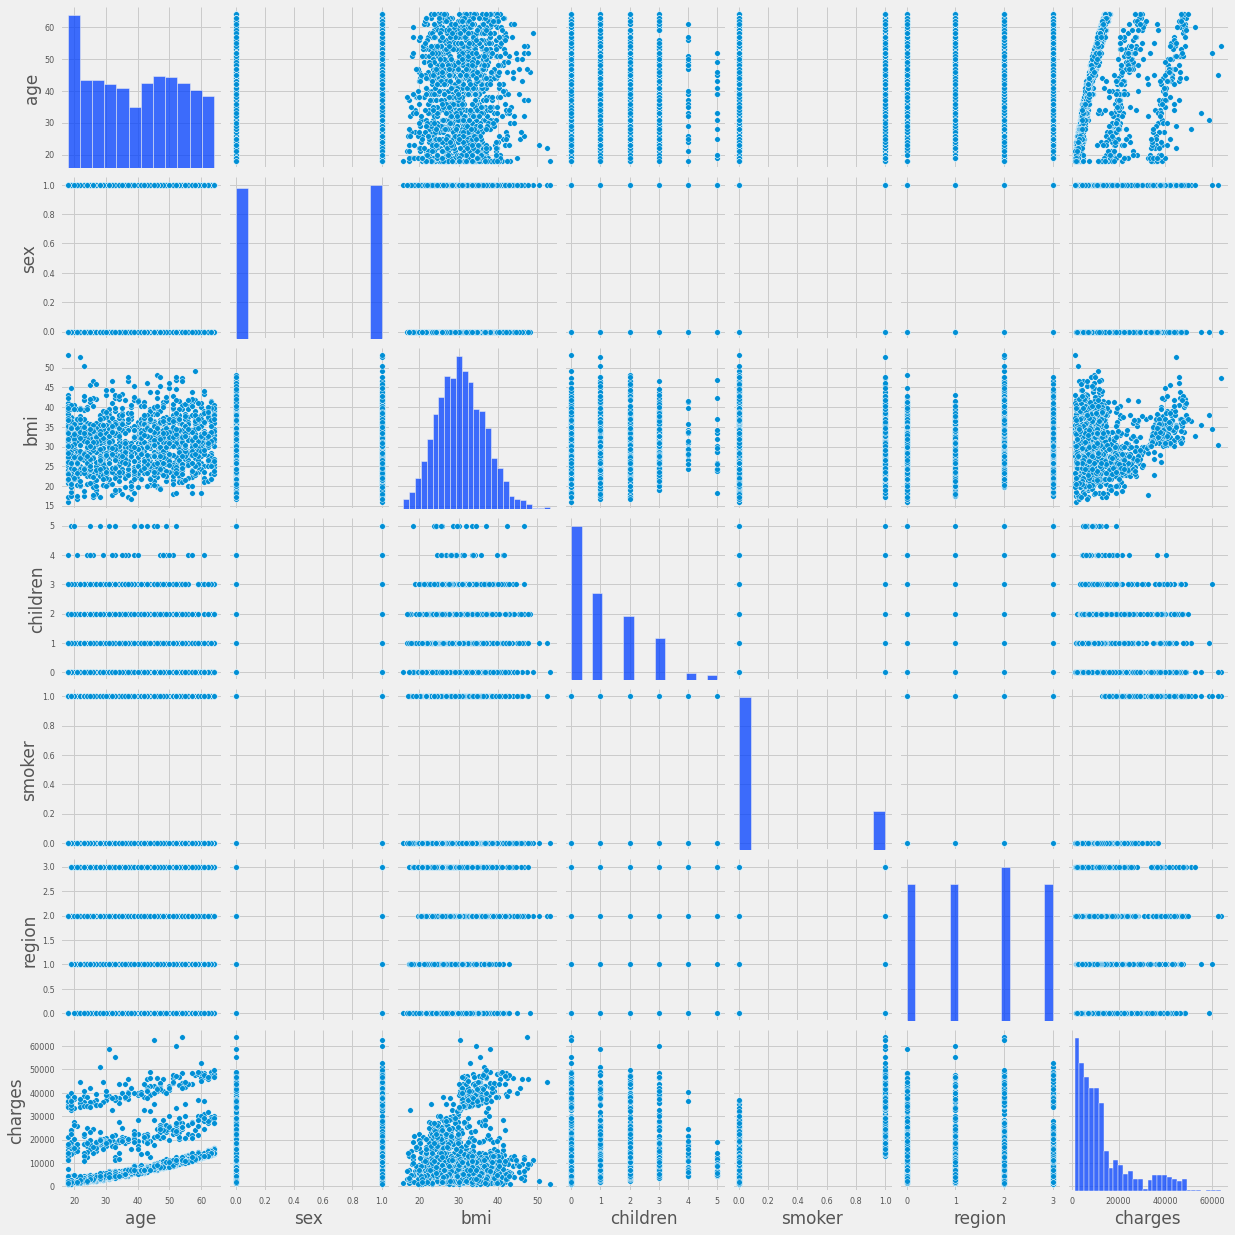

In [95]:
#PLOT PAIRPLOT OF DATASET
plt.figure(figsize=(12,5))
sns.pairplot(data =df)

<Figure size 864x360 with 0 Axes>

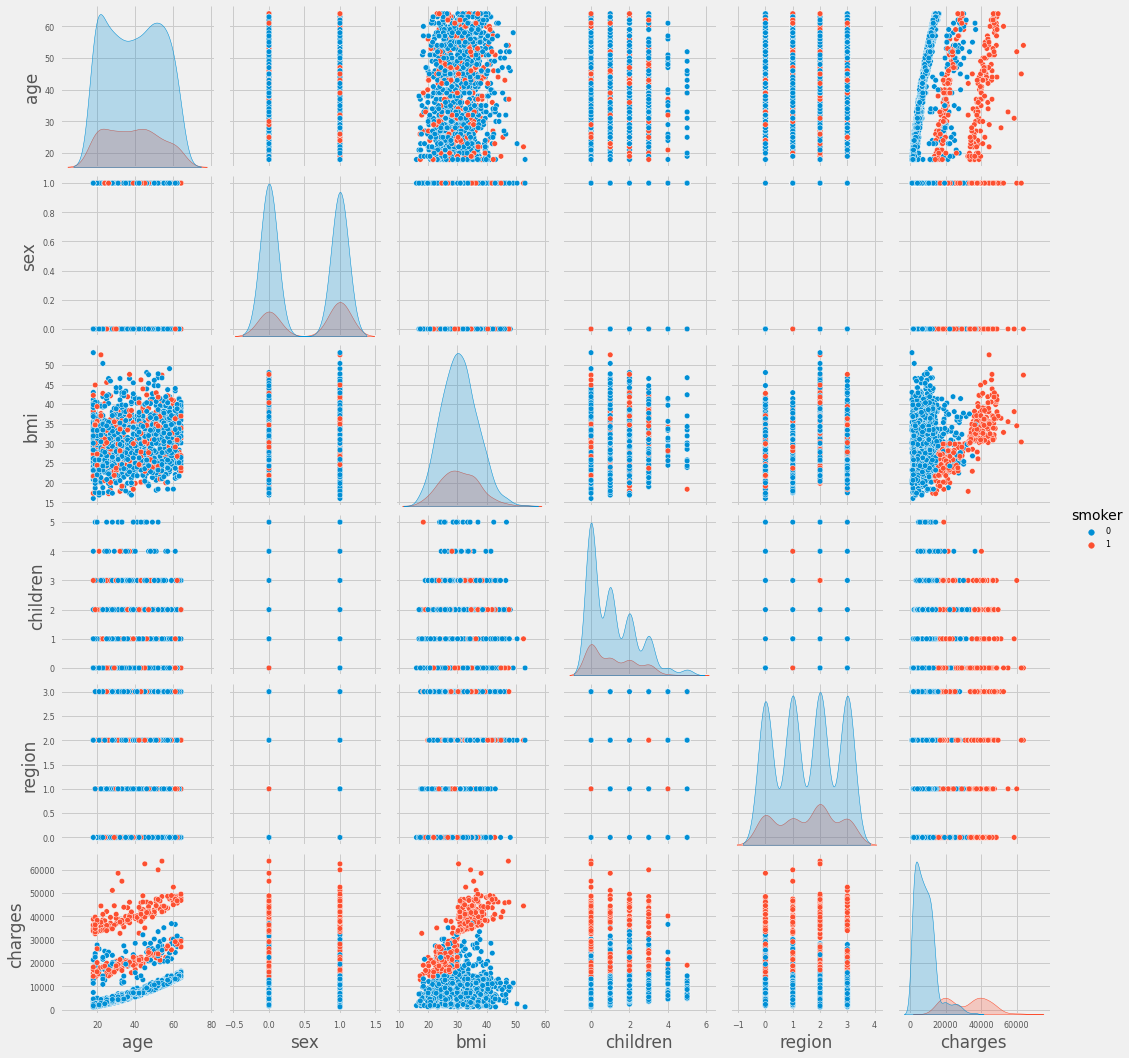

In [84]:
#PLOT PAIRPLOT WITH SMOKER AS A DISTINCTION FACTOR
plt.figure(figsize=(12,5))
sns.pairplot(data =df,  kind='scatter',hue='smoker',)

<AxesSubplot:xlabel='smoker', ylabel='charges'>

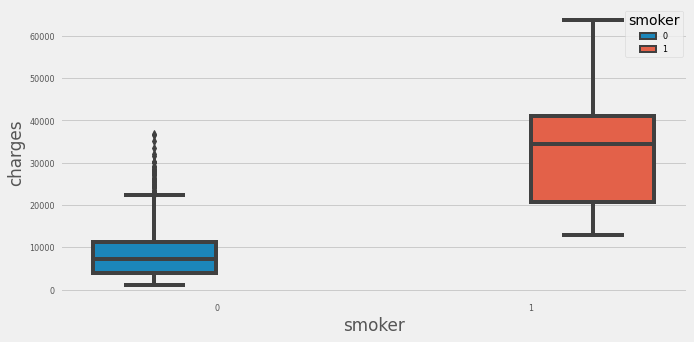

In [89]:
#BOX PLOT OF SMOKER VS CHARGES
plt.figure(figsize=(10,5))
sns.boxplot(x='smoker',y='charges',data=df,hue='smoker')


<AxesSubplot:xlabel='sex', ylabel='charges'>

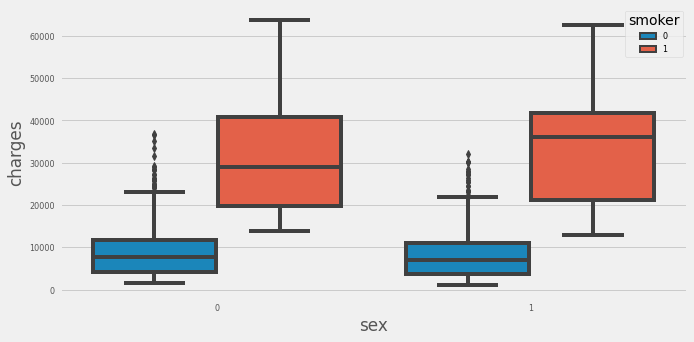

In [91]:
#BOX PLOT OF  SEX VS CHARGES WITH SMOKER AS A DISTINCTION FACTOR
plt.figure(figsize=(10,5))
sns.boxplot(x='sex',y='charges',data=df,hue='smoker')

<Figure size 1584x1440 with 0 Axes>

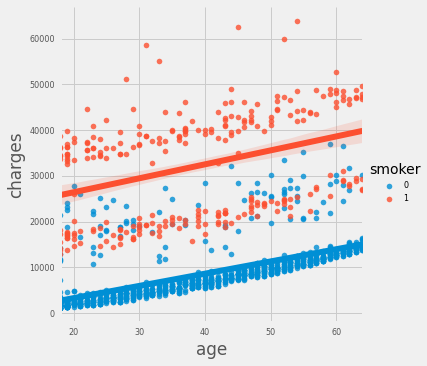

In [93]:
#REGRESSION OF AGE VS CHARGES WITH SMOKER AS DISTINCTION FACTOR
plt.figure(figsize=(22,20))
sns.lmplot(x='age',y='charges',data=df,hue='smoker')

<Figure size 1584x1440 with 0 Axes>

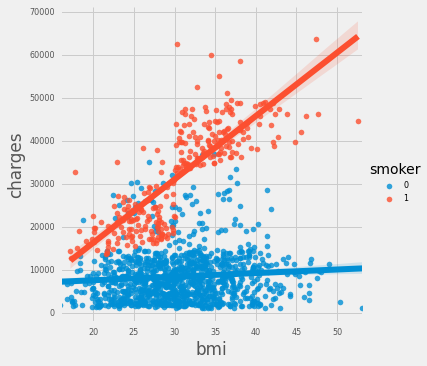

In [94]:
#REGRESSION OF BMI VS CHARGES WITH SMOKER AS A DISTINCTION FACTOR
plt.figure(figsize=(22,20))
sns.lmplot(x='bmi',y='charges',data=df,hue='smoker')

<AxesSubplot:xlabel='children', ylabel='charges'>

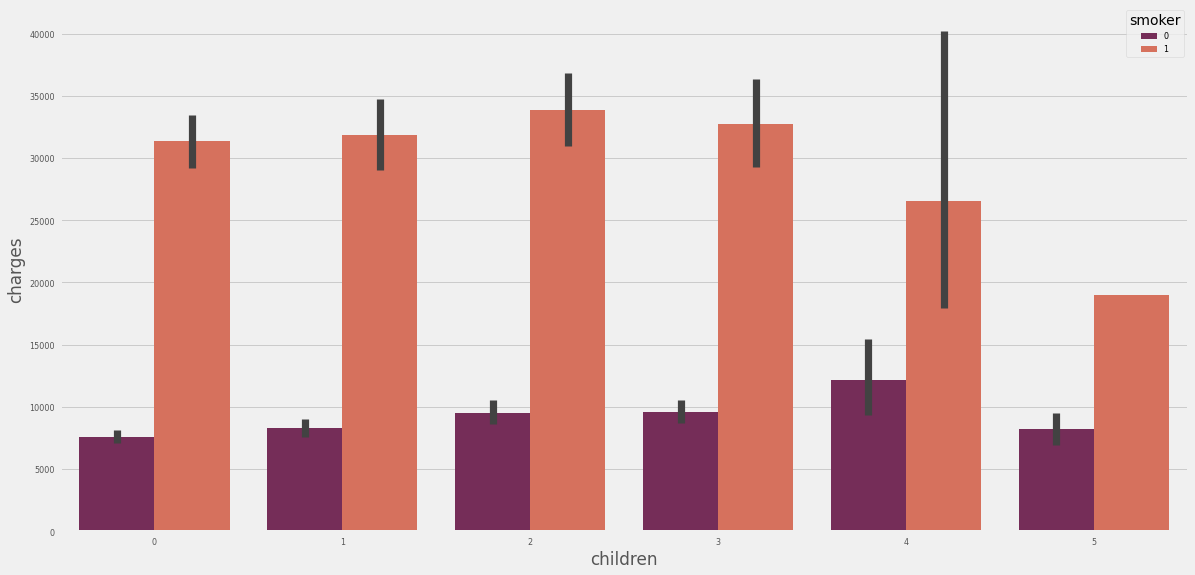

In [111]:
#BARPLOT FOR CHILDREN VS CHARGES WITH SMOKER AS A DISTINCTION FACTOR
plt.figure(figsize=(18,9))
sns.barplot(x='children',y='charges',data=df,hue='smoker',palette='rocket',
    saturation=0.7)

In [12]:
#SPLITTING DATASET INTO TRAINING AND TEST DATASET 
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size = 0.3,random_state =100)

In [13]:
#USING LINER REGRESSION FOR PREDICTION
from sklearn.linear_model import LinearRegression

lr = LinearRegression();
lr.fit(x_train,y_train);
y_pred = lr.predict(x_test);


In [14]:
#ACCURACY OF LINEAR REGRESSION
from sklearn.metrics import r2_score 
score = r2_score(y_test , y_pred)
print("Score :",score)
print("Accuracy : {} %".format(score*100))

Score : 0.7782937842162722
Accuracy : 77.82937842162721 %


In [103]:
#CALCULATION THE MATRICS
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 3935.5642513497337
Mean Squared Error: 32191230.3657192
Root Mean Squared Error: 5673.731608537647


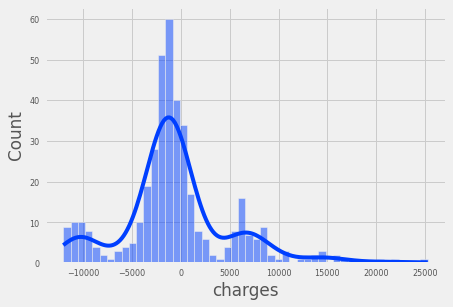

In [116]:
sns.histplot((y_test-y_pred),bins=50,kde=True);

Text(0, 0.5, 'Predicted Y')

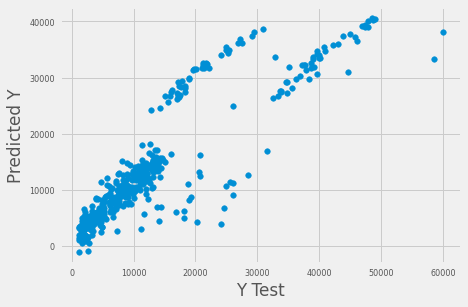

In [107]:
plt.scatter(y_test,y_pred)
plt.xlabel('TEST Y')
plt.ylabel('Predicted Y')

In [46]:
#USING RANDOM FOREST REGRESSOR TO PREDICT 
from sklearn.ensemble import RandomForestRegressor

In [29]:
#CHECK ACCURACY WITH DIFFERENT VALUES OF  n_estimator 
scores = []  
for i in range (1,100):
        rfr = RandomForestRegressor(n_estimators=i)
        rfr.fit(x_train,y_train)
        score_i=rfr.score(x_test,y_test)
        scores.append(score_i)

Text(0, 0.5, 'scores')

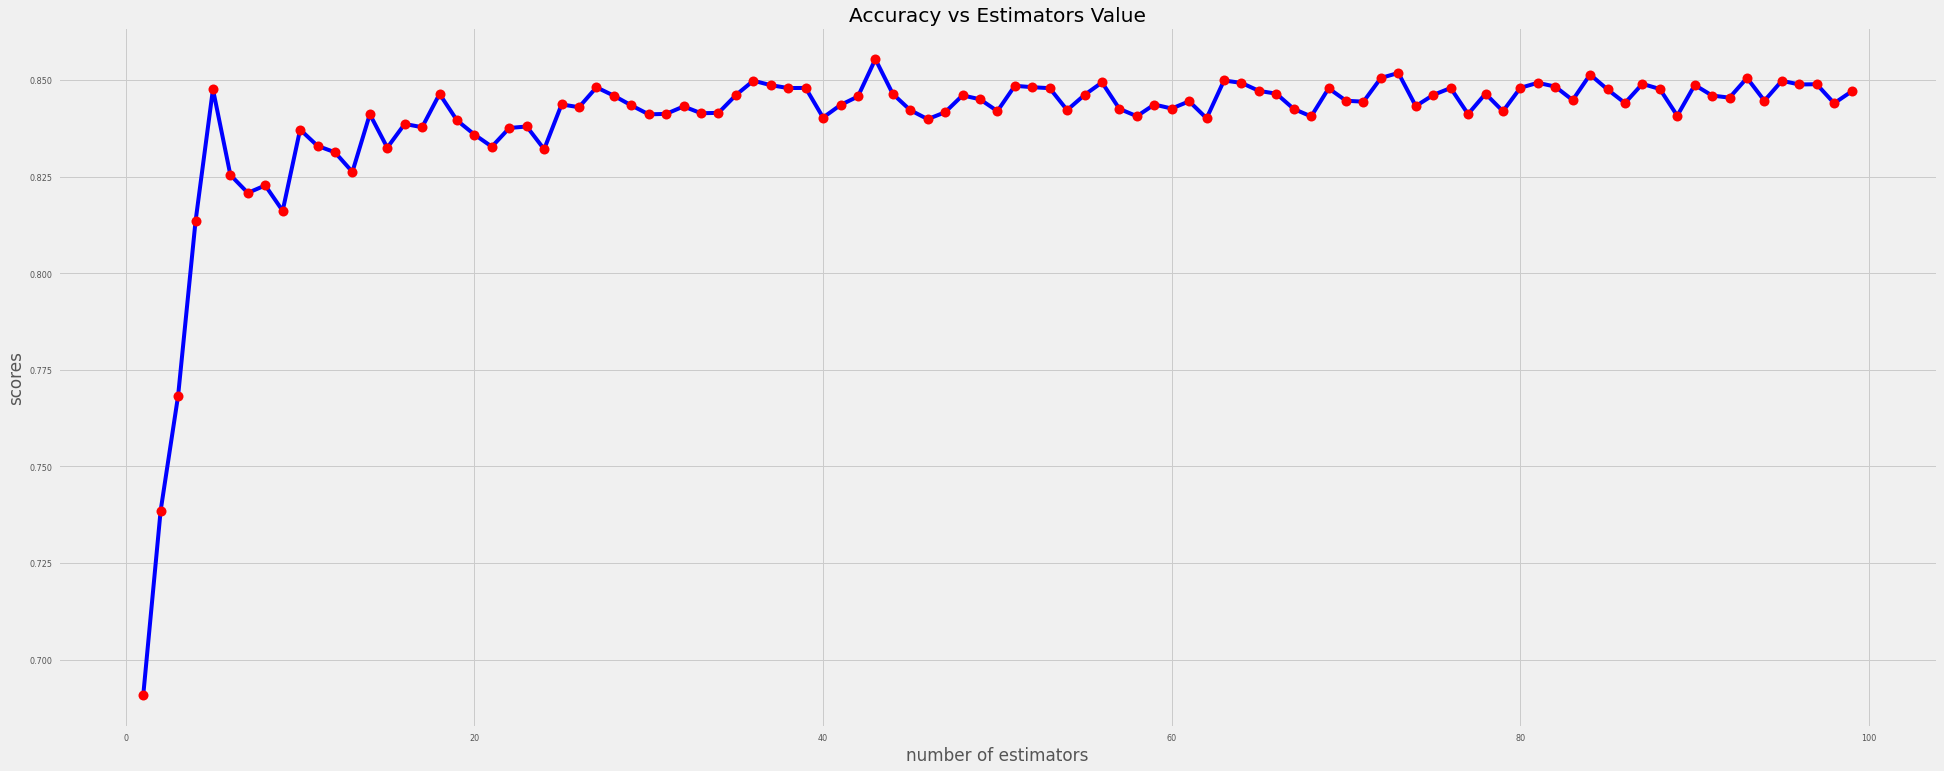

In [64]:
#plot accuracy vs n_estimator  values
plt.figure(figsize=(30,12))
plt.plot(range(1,100),scores,color='blue', linestyle='-', marker='o',
markerfacecolor='red', markersize=10)
plt.style.use('fivethirtyeight')
plt.title('Accuracy vs Estimators Value')
plt.xlabel('number of estimators')
plt.ylabel('scores')
#Accuracy reaches saturation after 50+ n_estimators

In [60]:
#THE MAX VALUE OF ACCURACY
print(max(scores))

0.8553741150195061


In [68]:
#TAKE n_estimator = 60
rfr = RandomForestRegressor(n_estimators=60)
rfr.fit(x_train,y_train)
rfr.score(x_test,y_test)
print("Score :",rfr.score(x_test,y_test))
print("Accuracy : {} %".format(rfr.score(x_test,y_test)*100))

Score : 0.8453319791488091
Accuracy : 84.53319791488092 %


#ACCUARCY OF RANDOM FOREST REGRESSOR IS MORE